In [159]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import scipy.stats
import seaborn as sns

In [160]:
df1 = pd.read_csv('measured_data/log_outdoor.txt',sep='|')

In [161]:
def getProcessedDF(initialdf):
    
    splitpos = []
    for index, row in initialdf.iterrows():
       timestamp = row['Time Stamp']
       if timestamp == 'Time Stamp':
            splitpos.append(index)
    dfs = np.split(initialdf, splitpos, axis=0)
    
    def deleteHead(df):
        return df.iloc[1:]
    def makeNumeric(df):
        df.RSSI = df.RSSI.apply(float)
        return df
    def averageRSSI(df):
        return df.groupby('BSSID', as_index=False).mean()
    def sortByRSSI(df):
        return df.sort_values('RSSI',ascending=False)
    def getDist(df):
        return float((df['dist'].iloc[0]))

    dfs = list(map(deleteHead,dfs))
    dists = np.array(list(map(getDist,dfs)))

    dfs = list(map(makeNumeric,dfs))
    dfs = list(map(averageRSSI,dfs))
    dfs = list(map(sortByRSSI,dfs))
    return dfs, dists # for single sample example





In [162]:
def getRankDict(prev,df,intersection=False):
        intersection = set(prev['BSSID']) & set(df['BSSID'])
        rankdict = {}
        counter = 1
        for index in range(len(df)):
            row = df.iloc[index]
            if not intersection: rankdict[row['BSSID']] = index
            else:
                if row['BSSID'] in intersection:
                    rankdict[row['BSSID']] = counter
                    counter += 1
        return rankdict

In [163]:
dfs, dists = getProcessedDF(df1)
dfs = dfs[:21]
spearmanDicts = []
for i in range(0,len(dfs)):
    spearmanDicts.append(getRankDict(dfs[0],dfs[i],intersection=False))
# print(rankDicts)
# baseIndex = np.where(dists == 0)[0][0]
# zeroPos = np.where(dists == 0)[0]
# print(zeroPos)
# base = spearmanDicts[0]
move = spearmanDicts[0:]

In [164]:
def getSpearmans(dict1,dict2):
    intersection = set(dict1.keys()) & set(dict2.keys())
    result = []
    for k in intersection:
        result.append((dict1[k],dict2[k]))
    result = np.array(result)
    resValue = scipy.stats.spearmanr(result)[0]
    return resValue

In [165]:
def  getJacard(dict1,dict2):
    set1 = set(dict1.keys())
    set2 = set(dict2.keys())
    print(len(set1 & set2),len(set1),len(set2))
    jacard = len(set1 & set2) / len(set1 | set2)
    return jacard

In [166]:
spearmans = []
jacards = []
Y = []
for i in range(len(move)):
    if dists[i] != 0:
        baseIndex = np.where(dists[:i] == 0)[0][-1]
        base = move[baseIndex]
        df = move[i]
        spearmans.append(getSpearmans(df,base))
        jacards.append(getJacard(df,base))
        Y.append(dists[i])
    
modelInput = np.array([spearmans,jacards])
Y = np.array(Y)

86 86 114
85 85 114
84 84 114
81 81 114
74 74 114
72 72 114
69 69 114
66 66 114
69 69 114
76 76 114
74 74 114
77 77 114
77 77 114
75 75 114
76 76 114
61 61 114
70 70 114
66 66 114
69 69 114
72 72 114


In [167]:
labels = Y[:,np.newaxis]
X = modelInput.swapaxes(1,0)

In [168]:
model = LinearRegression()

In [169]:
cv = cross_validate(model,X,labels,cv=10,scoring='neg_mean_squared_error', return_train_score = True)

In [170]:
cv

{'fit_time': array([0.00099635, 0.        , 0.0009973 , 0.00096989, 0.00299788,
        0.0009954 , 0.        , 0.00099802, 0.00099659, 0.        ]),
 'score_time': array([0.        , 0.00099778, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 'test_score': array([-11.36700635, -45.29998764, -34.81013314, -66.11176357,
        -10.67873036,  -6.96388013, -27.79732125, -24.15177622,
        -17.06230773, -75.77093237]),
 'train_score': array([-20.22446154, -18.19744637, -17.48207181, -15.05360848,
        -19.80954025, -20.21243423, -18.2340725 , -18.43831943,
        -19.35331756, -15.72477655])}

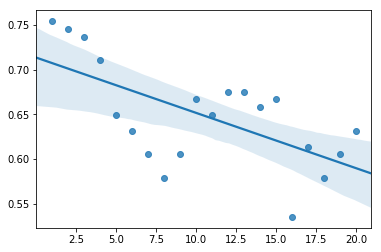

In [188]:
sns.regplot(labels[:,0],X[:,1])

In [187]:
model.fit(X,labels)
for a in zip(model.predict(X),labels):
    print(a)

(array([2.32781786]), array([1.]))
(array([4.36087473]), array([2.]))
(array([6.72119406]), array([3.]))
(array([7.60951032]), array([4.]))
(array([10.23450242]), array([5.]))
(array([11.28989569]), array([6.]))
(array([13.8309941]), array([7.]))
(array([14.17527246]), array([8.]))
(array([12.39662468]), array([9.]))
(array([7.23897399]), array([10.]))
(array([10.91782179]), array([11.]))
(array([8.52746118]), array([12.]))
(array([8.64009476]), array([13.]))
(array([9.16218121]), array([14.]))
(array([8.59238957]), array([15.]))
(array([16.82265792]), array([16.]))
(array([12.60721854]), array([17.]))
(array([15.86279311]), array([18.]))
(array([16.0667484]), array([19.]))
(array([12.61497322]), array([20.]))


In [173]:
model.coef

AttributeError: 'LinearRegression' object has no attribute 'coef'